# Gradient Descent & Activation Function

## Gradient Descent

The purpose of gradient descent is to derive which direction (and how much) to nudge our Weights Matrix and Bias Vector.  As a more formal definition, gradient descent is the derivative (slope) of the Weight Matrix across all dimensions.

In order for the algorithm to actually learn, we continually update and apply the found gradient (multiplied by the learning rate) until:

1. A specified number of epochs have passed
2. The loss becomes sufficiently low or training accuracy becomes sufficiently high
3. Loss has not improved for a specified number of epochs.

Pseudo code of what we want to accomplish looks like the following:

                        While True:
                             Wgradient = evaluate_gradient(loss,data,W)
                             W += -alpha * Wgradient

## Activation Functions

The activation function maps the scoring function output to a thresholding function (which is the activation function).  

Basically, for a particular data input/image, the scoring function value is a somewhat random/dirty value.  Remember, the scoring function value is simply the dot product of the Weight Matrix with the Input Matrix plus some Bias Vector values.  These values are not bounded in any way.  They might be 10 or 23.445 or 2.908 or who knows.

We need a way to confine these values (say between 0 and 1) and their relationships to eachother in order to draw meaningful conclusions.  This is the job of the activation function.

# Sigmoid Activation Function

The Sigmoid activation function is shown below and can be used to confine the scoring function values between 0 and 1.

1. If the sigmoid activation function outputs > 0.5, the neuron fires
2. If the sigmoid activation function outputs <= 0.5, the neuron does NOT fire

For simplicity, after we pass our scoring function values through the sigmoid activation function, we use the predict function to our neuron output to either a 0 or a 1.

### VERY IMPORTANT

Although we use "x" below for both the *sigmoid_activation* function and the *sigmoid_deriv* function, this is NOT the same "x".  The "x" in the *sigmoid_activation* function is our input data point (with all it's features).  The "x" in our *sigmoid_deriv* function is actually the output of our *sigmoid_activation* function.  This becomes more clear when we actually look at the form of the derivative of the sigmoid function.

<img src="images/Sigmoid.png">

<img src="images/Sigmoid_Derivative.png">

From the above equations, we can see that we actually use the output of our *sigmoid_activation* function in our *sigmoid_deriv* function.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import argparse

def sigmoid_activation(x):
    # compute the sigmoid activation value for a given input
    return 1.0 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    # copute the derivate of the sigmoid function ASSUMING
    # that the input 'x' has already been passed through the sigmoid
    # activation funciton
    return x*(1 - x)


[-6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5]


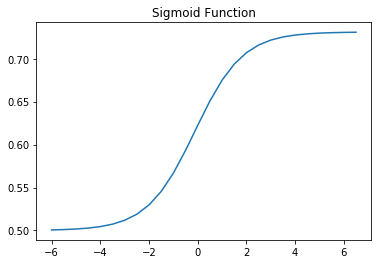

In [5]:
arr = np.arange(-6,7,.5)
print(arr)
y = sigmoid_activation(arr)

plt.plot(arr,sigmoid_activation(y))
plt.title("Sigmoid Function")
plt.show()

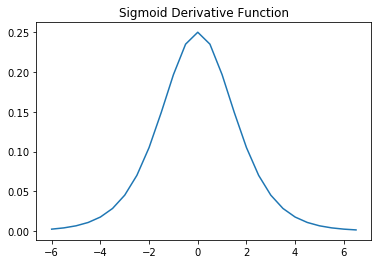

In [6]:
arr = np.arange(-6,7,.5)
plt.plot(arr,sigmoid_deriv(y))
plt.title("Sigmoid Derivative Function")
plt.show()

In [7]:
def predict(X, W):
    # take the dot product between our features and weight matrix
    preds = sigmoid_activation(X.dot(W))
    
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1
    
    # return the predictions
    return preds

# Build Argument Parser

We construct and argument parser that takes 2 inputs:
1. Number of Epochs
2. Alpha (Learning Rate) - Typical values: 0.1, 0.01, or 0.001

In [8]:
# Construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-e", "--epochs", type=float, default=100, help="# of epochs")
ap.add_argument("-a", "--alpha", type=float, default=0.01, help="learning rate")
args = vars(ap.parse_args)

# Create Data To Use

Rows, Columns
(1000, 1)
First 5 Labels
[[0]
 [1]
 [0]
 [1]
 [1]]
First 5 Input Data Entries
[[ -3.75777913   4.5291416 ]
 [ -7.91575179  -3.61404891]
 [  2.88672576   5.64336681]
 [ -9.0099072   -2.45499607]
 [-12.35882264  -3.80245842]]


Text(0.5, 1.0, 'Sample Data')

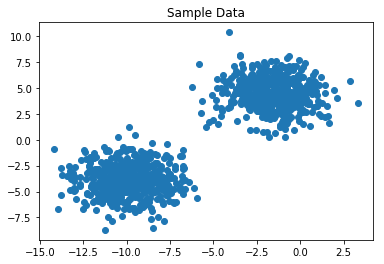

In [9]:
# Generate a 2-class classification problem with 1000 data points,
# where each data point is a 2D feature vector

(X, y) = make_blobs(n_samples=1000, n_features=2, centers = 2, cluster_std = 1.5, random_state=1)

# Reshpae y labels from a single array of 0's and 1's to a 1D np array column vector with 1000 rows, 
# each containing a single 0 or 1
y = y.reshape((y.shape[0],1))
print("Rows, Columns")
print(y.shape)
print("First 5 Labels")
print(y[0:5])
print("First 5 Input Data Entries")
print(X[0:5])

# Plot the feature data
plt.scatter(X[:, 0], X[:, 1])
plt.title("Sample Data")


# What is the Bias Trick

The bias trick allows us to incorporate the bias vecotor into the Weights Matrix and Input Data Matrix.  This is accomplished by:

1. Adding a 1 to the end of each of our X input data entries (Xi)
2. Adding the bias values to a column at the end of our Weights Matrix

In [10]:
# Insert a column of 1's as the last entry in the feature
# matrix -- this litter trick allows us to treat the bias
# as a trainable parameter within the weight matrix

# np.c_ appends np arrays together
# np.ones creates a 1 dimension np array of 1's

# The below function creates an np array of 1's the length of which is equal to the number of columns in X.
# It then appends these 1's to each Xi as an additional feature.  We're working towards the Bias Trick here.

X = np.c_[X, np.ones((X.shape[0]))]
print("The first X Entry")
print(X[0])

The first X Entry
[-3.75777913  4.5291416   1.        ]


In [11]:
# Partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing

# X takes the form of data inputs.  Each data input is represented by a row in an np array with n features
# Y takes the form of labels.  It has as many rows as X and contains a single label value.
# test_size defines the percentage of the dataset to use for testing
# random_state is the seed for the random number generator

(trainX, testX, trainY, testY) = train_test_split(X,y, test_size=0.5, random_state=42)
print("Number of Data Inputs to Use for Testing")
print(len(testX))

Number of Data Inputs to Use for Testing
500


In [12]:
# Initialize the weights matrix with normally distributed numbers
# The amount of weights matrix rows should match the input data matrix columns
# and list of losses
print("[INFO]... Training")
W = np.random.randn(X.shape[1],1)
print(W)
losses = []

[INFO]... Training
[[ 0.30581227]
 [-0.36999335]
 [ 0.27735573]]


# Loop for Epochs (follow the var types)

It's important to follow the variable types here.  In each loop through the number of Epochs, the following is being completed:

1. Calculate scoring function value for entire dataset (entire Data Matrix/all images)

     **|--> Output:** single scoring value per data input/image gives us a single column vector 
    
    
2. Feed this scoring value column vector value through the activation function (which includes a thresholding function) 

     **|--> Output:** converts all scoring function values to a single activation value b/n 0 and 1.  We therefore              end up with a single column vector of of values between 0 and 1. 
    
    
3. Calculate the error for each value in the column vector by subtracting the actual ground-truth label from the activation function value.

     **|--> Output:** single column vector (the loss vector) of difference between each activation function value and          the actual ground truth label
    
    
4. Use an error function to calculate a single error value from all lost values (here we use least squares a common loss for binary classification problems).
    
     **|--> Output:** single value that represents the "loss" for the particular Weights Matrix and Bias Vector                values of the specific Epoc
    
5. Calculate d, the error vector * the sigmoid derivative of the scoring function values thresholded between 0 and 1 (activation function output)

     **|--> Output:** single column vector

6. Calculate the gradient, the transpose of the data input/Images vector dotted with 'd'. NEED TO UNDERSTAND!!!!

    **|--> Output:** single column vector with 
    
    

In [13]:
# Loop for the desired number of Epochs
# Follow the variable types here...

args['epochs'] = 100
args['alpha'] = 0.01
for epoch in np.arange(0, args["epochs"]):
    # Take the dot product between our features 'X' and
    # our weight matrix 'W', then pass this value through
    # our sigmoid activation function, thereby giving us
    # our predictions on the dataset
    preds = sigmoid_activation(trainX.dot(W))
    
    # Now that we have our predictions, we need to determine
    # the 'error', which is the difference between our predictions
    # and the true values.
    error = preds - trainY
    loss = np.sum(error**2)
    losses.append(loss)
    
    # The gradient descent update is the dot product between our (1) features
    # and (2) the error of the sigmoid derivate of our predictions
    d = error*sigmoid_deriv(preds)
    gradient = trainX.T.dot(d)
    #print("GRADIENT")
    #print(gradient)
    
    # In the update state, all we need to do is "nudge" the weight
    # matrix in the negative direction of the gradient (hece the
    # term "gradient descent" by taking a small step towards a set
    # of "more optimal" parameters)
    W += -args["alpha"] * gradient
    
    # Check to see if an update should be displayed
    if epoch == 0 or (epoch + 1) % 5 == 0:
        print("[INFO] epoch={}, loss={:.7f}".format(int(epoch+1),loss))
    

[INFO] epoch=1, loss=159.2721371
[INFO] epoch=5, loss=12.1682418
[INFO] epoch=10, loss=7.7793810
[INFO] epoch=15, loss=6.3435478
[INFO] epoch=20, loss=5.4906022
[INFO] epoch=25, loss=4.5792148
[INFO] epoch=30, loss=3.3804000
[INFO] epoch=35, loss=2.1966002
[INFO] epoch=40, loss=1.4124637
[INFO] epoch=45, loss=0.9756590
[INFO] epoch=50, loss=0.7349439
[INFO] epoch=55, loss=0.5928668
[INFO] epoch=60, loss=0.5017256
[INFO] epoch=65, loss=0.4388578
[INFO] epoch=70, loss=0.3929048
[INFO] epoch=75, loss=0.3577549
[INFO] epoch=80, loss=0.3298909
[INFO] epoch=85, loss=0.3071657
[INFO] epoch=90, loss=0.2882019
[INFO] epoch=95, loss=0.2720775
[INFO] epoch=100, loss=0.2581531


# Evaluate the Model

In [14]:
# evaluate our model
print("[INFO] evaluating...")
preds = predict(testX, W)
print(classification_report(testY, preds))


[INFO] evaluating...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

   micro avg       1.00      1.00      1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



# Plot the Evaluation

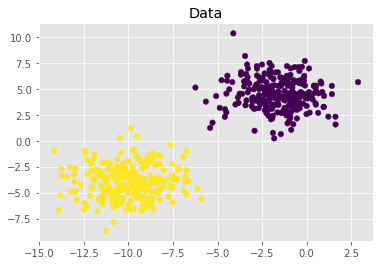

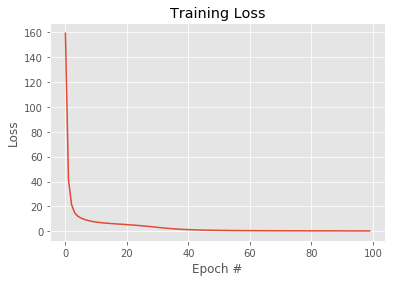

In [15]:
args["epochs"] = 100

# Plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:,0],testX[:,1], marker="o", c=testY[:,0], s=30)

# Construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,args["epochs"]), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

# Evaluating the Results

1. The data is clearly linearly seperable so the model drops in loss very quickly (the Weight Matrix is being updated in a way that allows our model to learn from the data)


2. Using simple Gradient Descent only allows an update of the Weight Matrix once per epoch (once per complete dataset).  We can improve on this by updating the Weights Matrix multiple times per epoch by feeding smaller image batches instead of the entire training dataset.  This is known as **Stochastic Gradient Descent**.

### Important Note

*"For simple gradient descent it is better to train for more epochs with a smaller learning rate"
Traverse the loss space carefully as to not jump over a minimum.*




https://beckernick.github.io/sigmoid-derivative-neural-network/

<img src="images/understand_error_signal.png">